<a href="https://colab.research.google.com/github/umersajid11/Fashion_Mnist-/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset , DataLoader
import torch.nn as nn
import torch.optim as  optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (f"Using Device : {device}")

Using Device : cuda


In [4]:
df = pd.read_csv('fashion-mnist_train.csv')

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


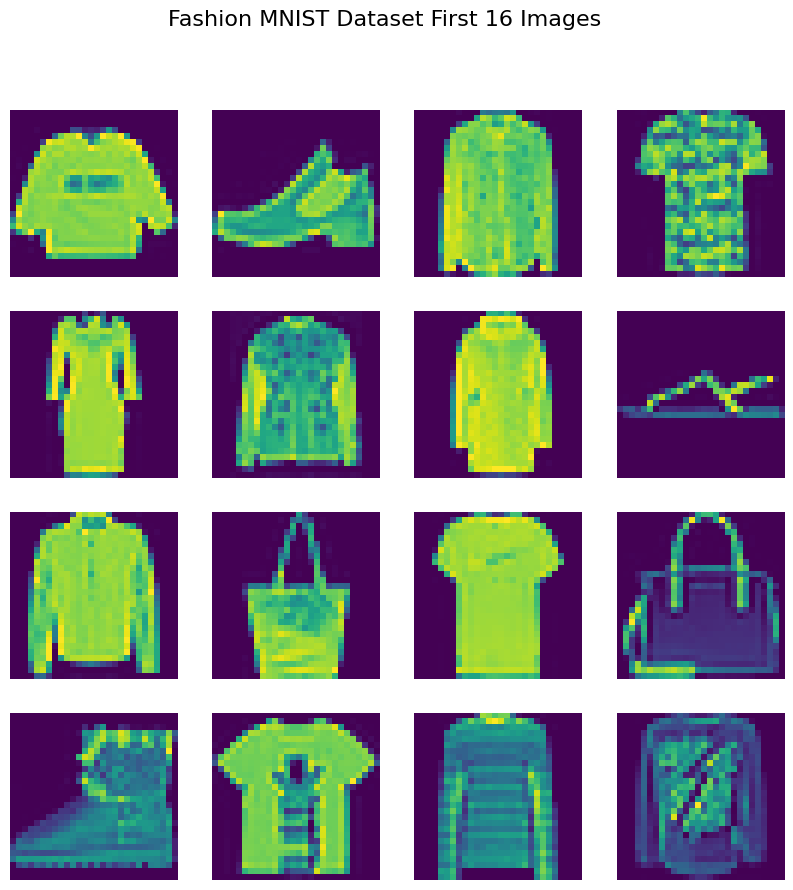

In [6]:
fig,axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
fig.suptitle('Fashion MNIST Dataset First 16 Images', fontsize=16)

for i , ax in enumerate(axes.flat):
  img= df.iloc[i, 1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')

In [7]:
x= df.iloc[:, 1:].values
y=df.iloc[: , 0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#Scaling the Feature
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
#Create Custom Dataset Class
class customDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)
  def __len__(self):
    return len(self.features)
  def __getitem__(self, idx):
    return self.features[idx] , self.labels[idx]

In [11]:
#Create  Train Dataset Object
train_dataset = customDataset(X_train, y_train)

In [12]:
len(train_dataset)

48000

In [13]:
train_dataset[1]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
#Create Test_dataset Object
test_dataset = customDataset(X_test, y_test)

In [15]:
#DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [16]:
#no Of Batches
len (train_loader)

1500

In [19]:
from torch.nn.modules.dropout import Dropout
#Define NN Class
class myNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64, 10)
    )
  def forward(self, x):
    return self.model(x)

In [20]:
epochs = 25
learrning_rate = 0.001

In [21]:
model = myNN(X_train.shape[1])

#For GPU:
model = model.to(device)
#Loss
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learrning_rate, weight_decay=1e-4)


In [22]:
for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:
    #total_epoch_loss = 0
    #Move Data to GPU
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    #forward Pass
    outputs = model(batch_features)

    #loss
    loss = criterion(outputs, batch_labels)

    #BackPass
    optimizer.zero_grad()
    loss.backward()

    #update Grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print (f'Epoch:{epoch+1}, Loss: {avg_loss}')

Epoch:1, Loss: 0.6294916576643785
Epoch:2, Loss: 0.4809446174701055
Epoch:3, Loss: 0.44392080369591713
Epoch:4, Loss: 0.42532828905185066
Epoch:5, Loss: 0.41214908157785735
Epoch:6, Loss: 0.3997617496997118
Epoch:7, Loss: 0.39118157121042413
Epoch:8, Loss: 0.3836336681296428
Epoch:9, Loss: 0.37185144471625486
Epoch:10, Loss: 0.36791604732473693
Epoch:11, Loss: 0.36906854444742204
Epoch:12, Loss: 0.36132466855148476
Epoch:13, Loss: 0.3533159078309933
Epoch:14, Loss: 0.3525403242409229
Epoch:15, Loss: 0.349981973995765
Epoch:16, Loss: 0.34503867907325425
Epoch:17, Loss: 0.34265165746212006
Epoch:18, Loss: 0.3401518649558226
Epoch:19, Loss: 0.33791381764411926
Epoch:20, Loss: 0.3399749605829517
Epoch:21, Loss: 0.33551037731766703
Epoch:22, Loss: 0.3310098756502072
Epoch:23, Loss: 0.33143879983822505
Epoch:24, Loss: 0.33441575470318397
Epoch:25, Loss: 0.33000103790064655


In [23]:
len(test_loader)

375

In [24]:
# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    correct = 0
    total = 0
    for features, labels in test_loader:
        features = features.to(device)
        labels = labels.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 88.07%


In [25]:
# Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    correct = 0
    total = 0
    for features, labels in train_loader:
        features = features.to(device)
        labels = labels.to(device)
        outputs = model(features)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.shape[0]
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 90.98%
